In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import load_workbook

In [2]:
#pattern 1
cep_file_path = "C:\\Users\\GE796684\\Documents\\metrics\\Pat2Multi\\CEPmemLatP2.xlsx"
sp_file_path = "C:\\Users\\GE796684\\Documents\\metrics\\Pat2Multi\\SPmemLatP2.xlsx"

# Define the columns and row range
columns = ["B", "D", "F", "H", "J"]
excel_sheets = ["LatP3", "LatP6", "LatP9"]
start_row = 2
end_row = 5513

In [3]:
def extract_data(file_path, label):
    wb = load_workbook(filename=file_path, data_only=True)
    records = []
    for sheet_name in excel_sheets:
        sheet = wb[sheet_name]
        for col in columns:
            for row in range(start_row, end_row + 1):
                val = sheet[f"{col}{row}"].value
                if val is not None:
                    records.append({
                        "Latency": val,
                        "Parallelism": sheet_name,
                        "System": label
                    })
    return pd.DataFrame(records)

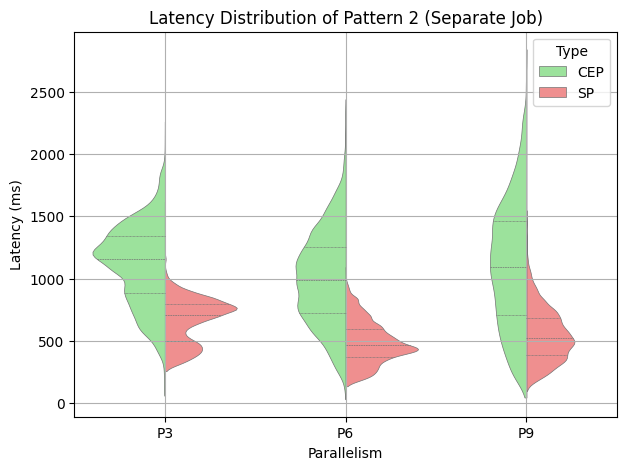

In [4]:
df_cep = extract_data(cep_file_path, "CEP")
df_sp = extract_data(sp_file_path, "SP")

df_all = pd.concat([df_cep,df_sp], ignore_index=True)

plt.figure(figsize=(7, 5))
sns.violinplot(
    x="Parallelism",
    y="Latency",
    hue="System",
    data=df_all,
    split=True,
    inner="quart",
    palette={"CEP": "#90EE90", "SP":"#FF7F7F"},
    linewidth=0.5,
    cut=0
)

plt.title("Latency Distribution of Pattern 2 (Separate Job)")
plt.ylabel("Latency (ms)")
plt.xlabel("Parallelism")

plt.xticks(ticks=[0, 1, 2], labels=["P3", "P6", "P9"])

handles, labels = plt.gca().get_legend_handles_labels()
custom_legend = ["CEP","SP"]
plt.legend(handles[:2] ,custom_legend,title="Type")

plt.grid(True)
plt.show()